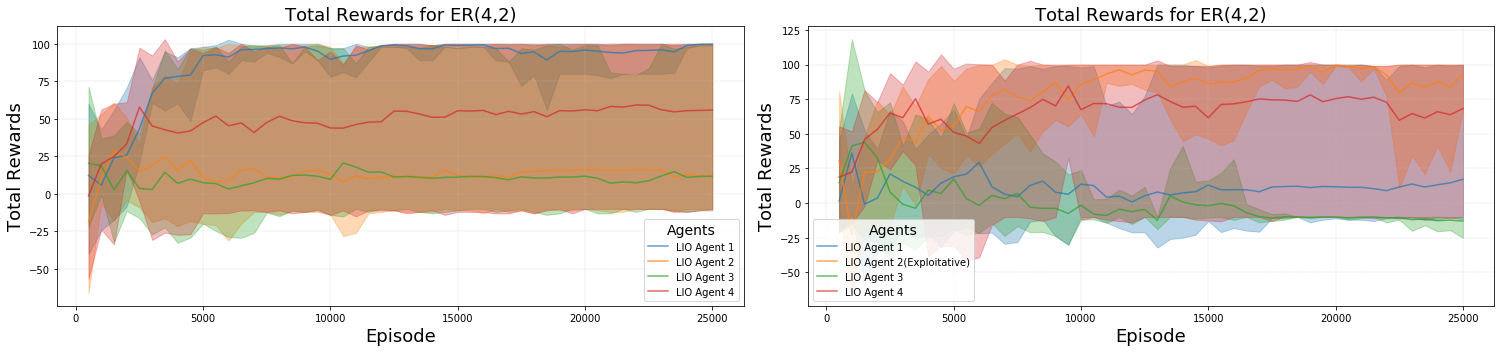

In [1]:

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Reward performance comparison of LIO in the ER(4,2) environment 

# Load data 
df_all_normal = []
for i in range(5):
    df_all_normal.append(pd.read_csv(f'lio/results/er{i+1}/LIO_test_ER42/log.csv'))

# Find minimum length
min_length_normal = min([len(df) for df in df_all_normal])
t_normal = df_all_normal[0]['episode'].values[:min_length_normal]

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 5))
# Colors for each agent
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Process rewards data for first plot - now sum three agents


# Plot individual agent rewards to see the difference
for agent_id, color in zip([1,2,3,4], colors):  # Plot each agent separately
    agent_rewards_normal = []
    for df in df_all_normal:
        agent_rewards_normal.append(df[f'A{agent_id}_reward_total'].values[:min_length_normal])
    agent_signal_normal = np.vstack(agent_rewards_normal)

    minsr_normal = np.min(agent_signal_normal, axis=0)
    maxsr_normal = np.max(agent_signal_normal, axis=0)
    meansr_mormal = np.mean(agent_signal_normal, axis=0)
    ax1.fill_between(t_normal, minsr_normal, maxsr_normal, alpha=0.3, color=color)
    ax1.plot(t_normal, meansr_mormal, color=color, 
             label=f'LIO Agent {agent_id}',
             linestyle='-', alpha=0.7)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(4,2)', fontsize=18)
ax1.legend(title='Agents', title_fontsize=14, loc='best')


# Reward performance comparison of LIO in the ER(4,2) environment with exploitative 2nd agent 

# Load data 
df_all_e = []
for i in range(5):
    df_all_e.append(pd.read_csv(f'lio/results/er{i+1}/LIO_Exploitative_test_ER42/log.csv'))

# Find minimum length
min_length_e = min([len(df) for df in df_all_e])
t_e = df_all_e[0]['episode'].values[:min_length_e]

# Plot individual agent rewards to see the difference
for agent_id, color in zip([1,2,3,4], colors):  # Plot each agent separately
    agent_rewards_e = []
    for df in df_all_e:
        agent_rewards_e.append(df[f'A{agent_id}_reward_total'].values[:min_length_e])
    agent_signal_e = np.vstack(agent_rewards_e)

    minsr_e = np.min(agent_signal_e, axis=0)
    maxsr_e = np.max(agent_signal_e, axis=0)
    meansr_e = np.mean(agent_signal_e, axis=0)
    ax2.fill_between(t_e, minsr_e, maxsr_e, alpha=0.3, color=color)
    ax2.plot(t_e, meansr_e, color=color, 
             label=f'LIO Agent {agent_id}{"(Exploitative)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)

ax2.grid(color='silver', linestyle='--', linewidth=0.3)
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Rewards', fontsize=18)
ax2.set_title('Total Rewards for ER(4,2)', fontsize=18)
ax2.legend(title='Agents', title_fontsize=14, loc='best')






plt.tight_layout()
plt.show()

# Save the performance plot with exploitative agent
fig.savefig('lio_Normal_Exploitative_ER42.png', dpi=300)

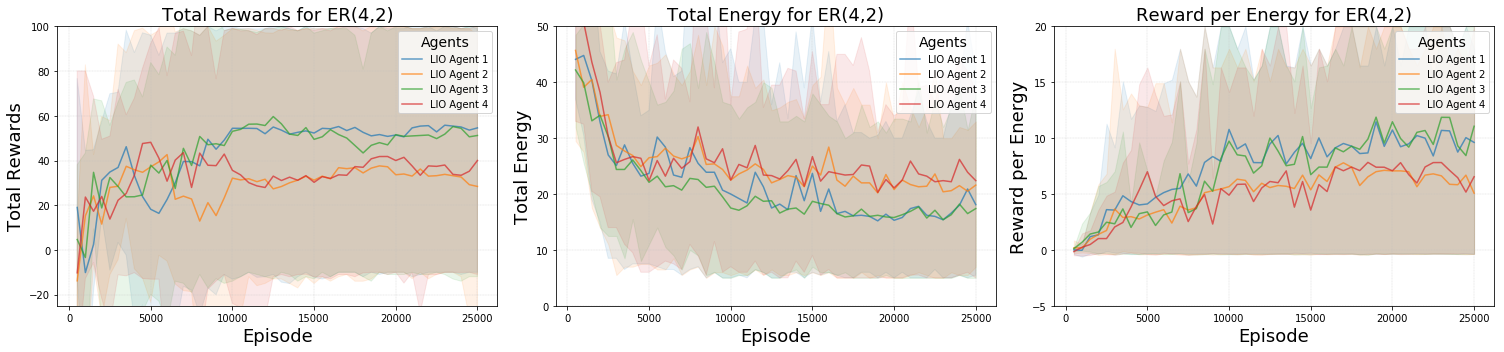

In [7]:
# Overall performance comparison of LIO in the ER(4,2) environment with all normal agents
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data 
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_normal_test_ER42/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
t = df_all[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))
# Colors for each agent
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Process rewards data for first plot - now sum three agents


# Plot 1: Total Rewards
# Plot individual agent rewards to see the difference
for agent_id, color in zip([1,2,3,4], colors):  # Plot each agent separately
    agent_rewards = []
    for df in df_all:
        agent_rewards.append(df[f'A{agent_id}_reward_total'].values[:min_length])
    agent_signal = np.vstack(agent_rewards)

    minsr = np.min(agent_signal, axis=0)
    maxsr = np.max(agent_signal, axis=0)
    meansr = np.mean(agent_signal, axis=0)
    ax1.fill_between(t, minsr, maxsr, alpha=0.1, color=color)
    ax1.plot(t, meansr, color=color, 
             label=f'LIO Agent {agent_id}',
             linestyle='-', alpha=0.7)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(4,2)', fontsize=18)
ax1.legend(title='Agents', title_fontsize=14, loc='best')


# Process collective energy data for second plot

# Plot 2: Total Energy
# Plot individual agent energy to see the difference

for agent_id, color in zip([1,2,3,4], colors):  # Plot each agent separately
    agent_energy = []
    for df in df_all:
        agent_energy.append(df[f'A{agent_id}_total_energy'].values[:min_length])
    agent_signal = np.vstack(agent_energy)

    minse = np.min(agent_signal, axis=0)
    maxse = np.max(agent_signal, axis=0)
    meanse = np.mean(agent_signal, axis=0)
    ax2.fill_between(t, minse, maxse, alpha=0.1, color=color)
    ax2.plot(t, meanse, color=color, 
             label=f'LIO Agent {agent_id}',
             linestyle='-', alpha=0.7)
    
ax2.grid(color='silver', linestyle='--', linewidth=0.3)    
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy for ER(4,2)', fontsize=18)
ax2.legend(title='Agents', title_fontsize=14, loc='best')


# Process reward per energy data for third plot

# Plot 3: Reward per Energy
# Plot individual agent reward per energy to see the difference

for agent_id, color in zip([1,2,3,4], colors):  # Plot each agent separately
    agent_rpe = []
    for df in df_all:
        agent_rpe.append(df[f'A{agent_id}_reward_per_energy'].values[:min_length])
    agent_signal = np.vstack(agent_rpe)

    minsrpe = np.min(agent_signal, axis=0)
    maxsrpe = np.max(agent_signal, axis=0)
    meansrpe = np.mean(agent_signal, axis=0)
    ax3.fill_between(t, minsrpe, maxsrpe, alpha=0.1, color=color)
    ax3.plot(t, meansrpe, color=color, 
             label=f'LIO Agent {agent_id}',
             linestyle='-', alpha=0.7)
    
ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy for ER(4,2)', fontsize=18)
ax3.legend(title='Agents', title_fontsize=14, loc='best')


# Adjust y-axis limits for better visualization
ax1.set_ylim(-25, 100)  # For total rewards
ax2.set_ylim(0, 50)     # For total energy
ax3.set_ylim(-5, 20)     # For reward per energy

plt.tight_layout()
plt.show()

# Save the performance plot with normal agent
fig.savefig('lio_normal_ER42_overall.png', dpi=300)

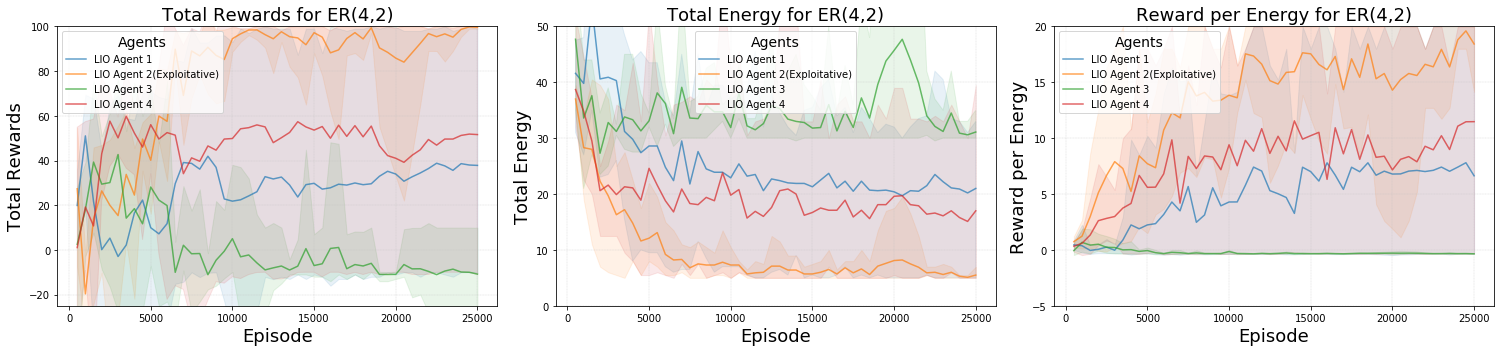

In [6]:
# Overall performance comparison of LIO in the ER(4,2) environment with exploitative 2nd agent 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data 
df_all = []
for i in range(5):
    df_all.append(pd.read_csv(f'lio/results/er{i+1}/LIO_Exploitative_test_ER42/log.csv'))

# Find minimum length
min_length = min([len(df) for df in df_all])
t = df_all[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))
# Colors for each agent
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Process rewards data for first plot - now sum three agents


# Plot 1: Total Rewards
# Plot individual agent rewards to see the difference
for agent_id, color in zip([1,2,3,4], colors):  # Plot each agent separately
    agent_rewards = []
    for df in df_all:
        agent_rewards.append(df[f'A{agent_id}_reward_total'].values[:min_length])
    agent_signal = np.vstack(agent_rewards)

    minsr = np.min(agent_signal, axis=0)
    maxsr = np.max(agent_signal, axis=0)
    meansr = np.mean(agent_signal, axis=0)
    ax1.fill_between(t, minsr, maxsr, alpha=0.1, color=color)
    ax1.plot(t, meansr, color=color, 
             label=f'LIO Agent {agent_id}{"(Exploitative)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)

ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(4,2)', fontsize=18)
ax1.legend(title='Agents', title_fontsize=14, loc='best')


# Process collective energy data for second plot

# Plot 2: Total Energy
# Plot individual agent energy to see the difference

for agent_id, color in zip([1,2,3,4], colors):  # Plot each agent separately
    agent_energy = []
    for df in df_all:
        agent_energy.append(df[f'A{agent_id}_total_energy'].values[:min_length])
    agent_signal = np.vstack(agent_energy)

    minse = np.min(agent_signal, axis=0)
    maxse = np.max(agent_signal, axis=0)
    meanse = np.mean(agent_signal, axis=0)
    ax2.fill_between(t, minse, maxse, alpha=0.1, color=color)
    ax2.plot(t, meanse, color=color, 
             label=f'LIO Agent {agent_id}{"(Exploitative)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)
    
ax2.grid(color='silver', linestyle='--', linewidth=0.3)    
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy for ER(4,2)', fontsize=18)
ax2.legend(title='Agents', title_fontsize=14, loc='best')


# Process reward per energy data for third plot

# Plot 3: Reward per Energy
# Plot individual agent reward per energy to see the difference

for agent_id, color in zip([1,2,3,4], colors):  # Plot each agent separately
    agent_rpe = []
    for df in df_all:
        agent_rpe.append(df[f'A{agent_id}_reward_per_energy'].values[:min_length])
    agent_signal = np.vstack(agent_rpe)

    minsrpe = np.min(agent_signal, axis=0)
    maxsrpe = np.max(agent_signal, axis=0)
    meansrpe = np.mean(agent_signal, axis=0)
    ax3.fill_between(t, minsrpe, maxsrpe, alpha=0.1, color=color)
    ax3.plot(t, meansrpe, color=color, 
             label=f'LIO Agent {agent_id}{"(Exploitative)" if agent_id==2 else ""}',
             linestyle='-', alpha=0.7)
    
ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy for ER(4,2)', fontsize=18)
ax3.legend(title='Agents', title_fontsize=14, loc='best')


# Adjust y-axis limits for better visualization
ax1.set_ylim(-25, 100)  # For total rewards
ax2.set_ylim(0, 50)     # For total energy
ax3.set_ylim(-5, 20)     # For reward per energy

plt.tight_layout()
plt.show()

# Save the performance plot with exploitative agent
fig.savefig('lio_Exploitative_ER42_overall.png', dpi=300)

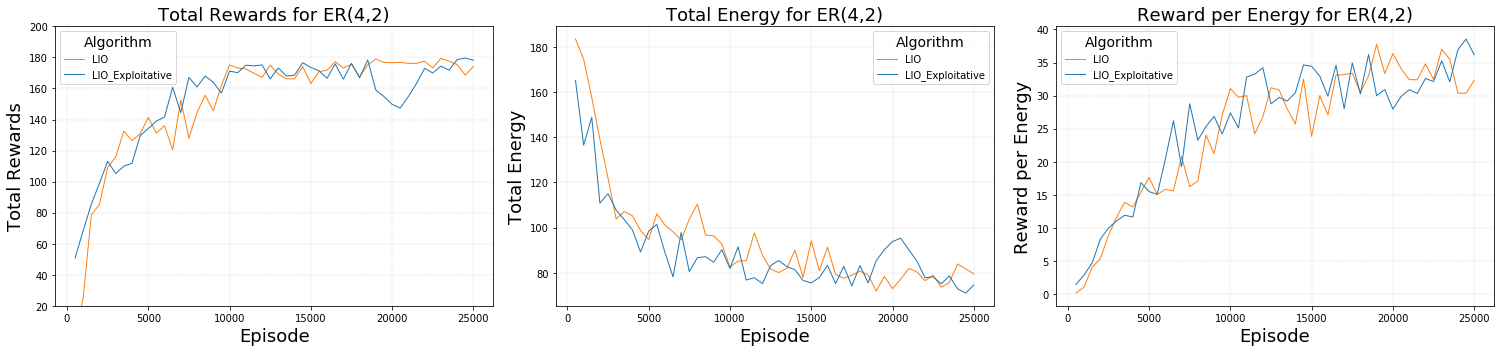

In [8]:
# Overall performance comparison of LIO and its exploitative case  in the ER(4,2) environment 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_all_LIO = []
df_all_LIO_Exploitative = []

for i in range(5):
    df_all_LIO.append(pd.read_csv(f'lio/results/er%d/LIO_normal_test_ER42/log.csv'%(i+1)))
    df_all_LIO_Exploitative.append(pd.read_csv(f'lio/results/er%d/LIO_Exploitative_test_ER42/log.csv'%(i+1)))
    
# Find minimum length across all dataframes
min_length = min([len(df) for df in df_all_LIO + df_all_LIO_Exploitative])
t = df_all_LIO[0]['episode'].values[:min_length]

# Create three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Process rewards data for first plot: collective return
signal1 = np.zeros((len(df_all_LIO), min_length))  # LIO
signal2 = np.zeros((len(df_all_LIO_Exploitative), min_length))  # LIO_Exploitative

# Fill arrays with data from each run
for idx, df in enumerate(df_all_LIO):
    signal1[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] + 
                   df['A3_reward_total'].values[:min_length]
                   + df['A4_reward_total'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Exploitative):
    signal2[idx] = (df['A1_reward_total'].values[:min_length] + 
                   df['A2_reward_total'].values[:min_length] + 
                   df['A3_reward_total'].values[:min_length]
                   + df['A4_reward_total'].values[:min_length])

# Plot 1: Total Rewards 
mins1 = np.min(signal1, axis=0)
maxs1 = np.max(signal1, axis=0)
means1 = np.mean(signal1, axis=0)

mins2 = np.min(signal2, axis=0)
maxs2 = np.max(signal2, axis=0)
means2 = np.mean(signal2, axis=0)




ax1.plot(t, means1, color='tab:orange', label='LIO', linewidth=1)

ax1.plot(t, means2, color='tab:blue', label='LIO_Exploitative', linewidth=1)



ax1.grid(color='silver', linestyle='--', linewidth=0.3)
ax1.set_xlabel('Episode', fontsize=18)
ax1.set_ylabel('Total Rewards', fontsize=18)
ax1.set_title('Total Rewards for ER(4,2)', fontsize=18)
ax1.legend(title='Algorithm', title_fontsize=14, loc='best')
ax1.set_ylim(20, 200)

# Process collective energy data for second plot
energy1 = np.zeros((len(df_all_LIO), min_length)) # LIO
energy2 = np.zeros((len(df_all_LIO_Exploitative), min_length)) # LIO_Exploitative

for idx, df in enumerate(df_all_LIO):
    energy1[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length] +
                   df['A3_total_energy'].values[:min_length]
                   + df['A4_total_energy'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Exploitative):
    energy2[idx] = (df['A1_total_energy'].values[:min_length] + 
                   df['A2_total_energy'].values[:min_length] +
                   df['A3_total_energy'].values[:min_length]
                   + df['A4_total_energy'].values[:min_length])


# Plot 2: Total Energy 
mins_e1 = np.min(energy1, axis=0)
maxs_e1 = np.max(energy1, axis=0)
means_e1 = np.mean(energy1, axis=0)

mins_e2 = np.min(energy2, axis=0)
maxs_e2 = np.max(energy2, axis=0)
means_e2 = np.mean(energy2, axis=0)


ax2.plot(t, means_e1, color='tab:orange', label='LIO', linewidth=1)

ax2.plot(t, means_e2, color='tab:blue', label='LIO_Exploitative', linewidth=1)


ax2.grid(color='silver', linestyle='--', linewidth=0.3)
ax2.set_xlabel('Episode', fontsize=18)
ax2.set_ylabel('Total Energy', fontsize=18)
ax2.set_title('Total Energy for ER(4,2)', fontsize=18)
ax2.legend(title='Algorithm', title_fontsize=14, loc='best')

# Process reward per energy data for third plot
rpe1 = np.zeros((len(df_all_LIO), min_length))
rpe2 = np.zeros((len(df_all_LIO_Exploitative), min_length))

for idx, df in enumerate(df_all_LIO):
    rpe1[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length] +
                   df['A3_reward_per_energy'].values[:min_length]
                   + df['A4_reward_per_energy'].values[:min_length])

for idx, df in enumerate(df_all_LIO_Exploitative):
    rpe2[idx] = (df['A1_reward_per_energy'].values[:min_length] + 
                   df['A2_reward_per_energy'].values[:min_length] +
                   df['A3_reward_per_energy'].values[:min_length]
                   + df['A4_reward_per_energy'].values[:min_length])

# Plot 3: Reward per Energy 
mins_r1 = np.min(rpe1, axis=0)
maxs_r1 = np.max(rpe1, axis=0)
means_r1 = np.mean(rpe1, axis=0)

mins_r2 = np.min(rpe2, axis=0)
maxs_r2 = np.max(rpe2, axis=0)
means_r2 = np.mean(rpe2, axis=0)



ax3.plot(t, means_r1, color='tab:orange', label='LIO', linewidth=1)

ax3.plot(t, means_r2, color='tab:blue', label='LIO_Exploitative', linewidth=1)

ax3.grid(color='silver', linestyle='--', linewidth=0.3)
ax3.set_xlabel('Episode', fontsize=18)
ax3.set_ylabel('Reward per Energy', fontsize=18)
ax3.set_title('Reward per Energy for ER(4,2)', fontsize=18)
ax3.legend(title='Algorithm', title_fontsize=14, loc='best')

plt.tight_layout()
plt.show()


# Save figure
fig.savefig('Overall_performance_LIO_Exploitative_ER42.png', dpi=300)